In [5]:
%run utils.ipynb 
%run models.ipynb

features_final = ['name','device_type','box_id','false_character','hold_for','key_pressed','long_pressed_equivalent','platform','pressed_after']


In [7]:
df = pd.read_csv('../data/clean_union_04_28_20_20_00.csv')
df = df[features_final]
df.shape

(14532, 9)

In [8]:
df.sample(5)

,name,device_type,box_id,false_character,hold_for,key_pressed,long_pressed_equivalent,platform,pressed_after
9038,Kedar,Computer/Laptop,#text-area-1,f,112,.,1,MacIntel,716
13904,Dharti,Computer/Laptop,#text-area-test,f,83,g,1,MacIntel,391
467,Varun Sapre,Computer/Laptop,#text-area-3,t,79,y,1,Win32,0
2179,Goddess,Computer/Laptop,#text-area-1,f,150,a,1,Win32,172
14386,Tarun,Computer/Laptop,#text-area-3,t,126,n,1,Win32,187


In [9]:
models = Models(df.copy(), 0.2, False)
models_b = Models(df.copy(), 0.2, True)

** Non-numeric columns encoded
** Unbalanced stratified per class train_test split
(11625, 8) (2907, 8) (11625,) (2907,)
** Non-numeric columns encoded
** Balanced stratified per class train_test split
(7716, 8) (1929, 8) (7716,) (1929,)


In [10]:
split = pd.DataFrame(list(zip(models.df['name'].value_counts().sort_index(), models.y_train.value_counts().sort_index(), models.y_test.value_counts().sort_index())), columns=['total','train','test'])
split['train_perc'] = split['train']/(split['train']+split['test'])
split['test_perc'] = split['test']/(split['train']+split['test'])
split

,total,train,test,train_perc,test_perc
0,725,580,145,0.800000,0.200000
1,1024,819,205,0.799805,0.200195
2,657,526,131,0.800609,0.199391
3,1380,1104,276,0.800000,0.200000
4,855,684,171,0.800000,0.200000
5,735,588,147,0.800000,0.200000
6,775,620,155,0.800000,0.200000
7,778,622,156,0.799486,0.200514
8,643,514,129,0.799378,0.200622
9,1746,1397,349,0.800115,0.199885


In [11]:
split_bal = pd.DataFrame(list(zip(models_b.df['name'].value_counts().sort_index(), models_b.y_train.value_counts().sort_index(), models_b.y_test.value_counts().sort_index())), columns=['total','train','test'])
split_bal['train_perc'] = split_bal['train']/(split_bal['train']+split_bal['test'])
split_bal['test_perc'] = split_bal['test']/(split_bal['train']+split_bal['test'])
split_bal

,total,train,test,train_perc,test_perc
0,725,515,128,0.800933,0.199067
1,1024,515,128,0.800933,0.199067
2,657,514,129,0.799378,0.200622
3,1380,514,129,0.799378,0.200622
4,855,514,129,0.799378,0.200622
5,735,515,128,0.800933,0.199067
6,775,514,129,0.799378,0.200622
7,778,515,128,0.800933,0.199067
8,643,514,129,0.799378,0.200622
9,1746,515,128,0.800933,0.199067


In [12]:
model_results = pd.DataFrame()

## Naive Bayes

In [13]:
gnb, y_pred = models.NB()
models.accuracy_score(y_pred)

0.39

In [14]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.42      0.47      0.44       145
           1       0.17      0.04      0.06       205
           2       0.40      0.72      0.52       131
           3       0.33      0.16      0.21       276
           4       0.38      0.25      0.30       171
           5       0.27      0.02      0.04       147
           6       0.69      0.16      0.26       155
           7       0.21      0.72      0.32       156
           8       0.39      0.40      0.39       129
           9       1.00      1.00      1.00       349
          10       0.83      0.03      0.05       198
          11       0.22      0.69      0.33       147
          12       0.27      0.39      0.32       249
          13       0.58      0.38      0.46       271
          14       0.31      0.24      0.27       178

    accuracy                           0.39      2907
   macro avg       0.43      0.38      0.33      2907
weighted avg       0.47   

In [15]:
model_results = model_results.append(models.class_score(y_pred, 'Naive Bayes'))
# model_results

## Logistic Regression

In [16]:
lr, y_pred = models.LR()
models.accuracy_score(y_pred)

0.17

In [17]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.00      0.00      0.00       205
           2       0.00      0.00      0.00       131
           3       0.13      0.75      0.23       276
           4       0.00      0.00      0.00       171
           5       0.00      0.00      0.00       147
           6       0.00      0.00      0.00       155
           7       0.14      0.06      0.08       156
           8       0.00      0.00      0.00       129
           9       0.32      0.73      0.45       349
          10       0.05      0.09      0.06       198
          11       0.00      0.00      0.00       147
          12       0.00      0.00      0.00       249
          13       0.10      0.05      0.07       271
          14       0.00      0.00      0.00       178

    accuracy                           0.17      2907
   macro avg       0.05      0.11      0.06      2907
weighted avg       0.07   

In [18]:
model_results = model_results.append(models.class_score(y_pred, 'Logistic Regression'))

## Random Forest

In [19]:
rf, y_pred = models.RF()
models.accuracy_score(y_pred)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s


Average number of nodes 7547
Average maximum depth 28


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


0.68

In [20]:
print(models.classification_report(y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       145
           1       0.74      0.80      0.77       205
           2       0.61      0.62      0.61       131
           3       0.66      0.88      0.75       276
           4       0.57      0.44      0.50       171
           5       0.42      0.32      0.36       147
           6       0.56      0.54      0.55       155
           7       0.31      0.26      0.28       156
           8       0.57      0.40      0.47       129
           9       1.00      1.00      1.00       349
          10       0.63      0.58      0.60       198
          11       0.68      0.49      0.57       147
          12       0.79      0.95      0.86       249
          13       0.75      0.87      0.81       271
          14       0.57      0.53      0.55       178

    accuracy                           0.68      2907
   macro avg       0.63      0.62      0.62      2907
weighted avg       0.67   

In [21]:
model_results = model_results.append(models.class_score(y_pred, 'Random Forest'))

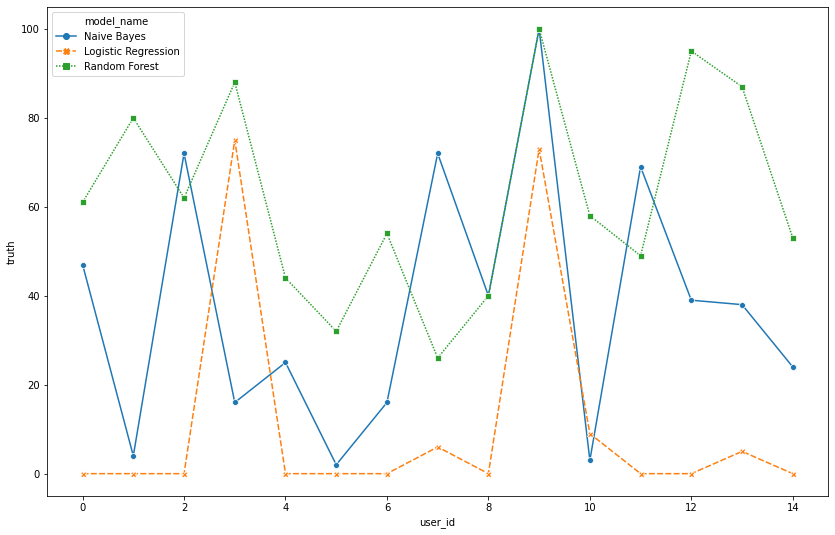

In [22]:
plt.figure(figsize=(14,9))
plt.title('')
sns.lineplot(x='user_id', y='truth', hue='model_name', style='model_name', data=model_results, markers=True)